In [1]:
import torch
import torchvision

import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.optim import Adam

In [2]:
class MnistCNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv2d1 = nn.Conv2d(1, 32, 5, padding='same')
        self.conv2d2 = nn.Conv2d(32, 64, 5, padding='same')
        
        self.linear1 = nn.Linear(3136, 1024)
        self.linear2 = nn.Linear(1024, 10)

        self.max_pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv2d1(x)
        x = F.relu(x)
        x = self.max_pool(x)
        
        x = self.conv2d2(x)
        x = F.relu(x)
        x = self.max_pool(x)
        
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.linear2(x)
        
        # x = F.softmax(x)

        return x

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 100
train_set = torchvision.datasets.MNIST(root='./data/', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data/', train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [4]:
# model
model = MnistCNNModel()

# loss
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = Adam(model.parameters(), lr=0.0001)

for epoch in range(100):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        # labels_one_hot = F.one_hot(labels, 10).double()
        # Zero your gradients for every batch!
        optimizer.zero_grad()
    
        # output of model
        print('inputs', inputs.size())
        outputs = model(inputs)
        print('outputs', outputs.size())
        
        loss = loss_fn(outputs, labels)
        loss.backward()
    
        optimizer.step()
        
        if i % 200 == 0:
            print(epoch, i)
            print(loss.item())
            # print('w Grad', torch.sum((inputs * (outputs - labels)) / 5))
            # print('b Grad', torch.sum((outputs - labels) / 5))
            print('---------')

inputs torch.Size([100, 1, 28, 28])
outputs torch.Size([100, 10])
0 0
2.3124916553497314
---------
inputs torch.Size([100, 1, 28, 28])


KeyboardInterrupt: 

In [5]:
all_test_inputs = None
all_test_labels = None

for j, data in enumerate(test_loader):
        inputs_test, labels_test = data 
        if all_test_inputs is None:
            all_test_inputs = inputs_test
            all_test_labels = labels_test
        else:
            all_test_inputs = torch.cat((all_test_inputs, inputs_test))
            all_test_labels = torch.cat((all_test_labels, labels_test))

In [6]:
def plot(img, label, prediction):
    plt.title(str(label) + ' ' + str(prediction))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

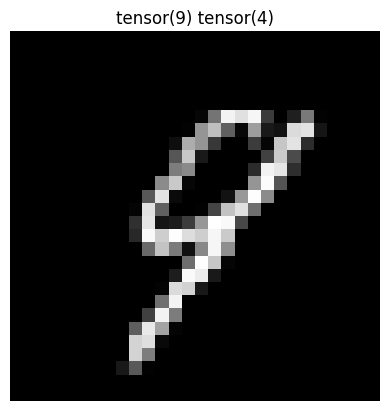

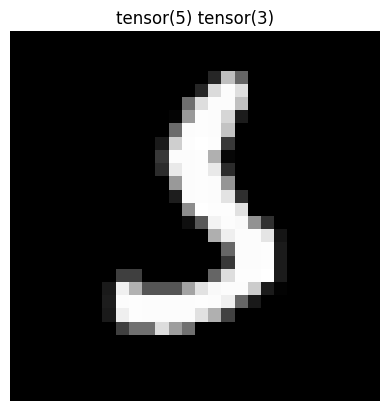

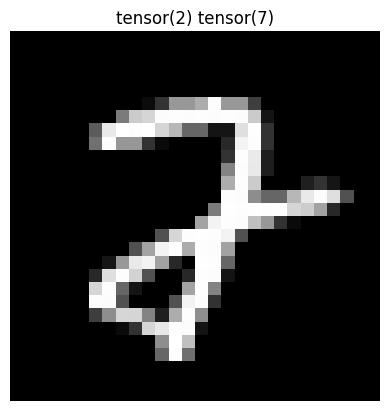

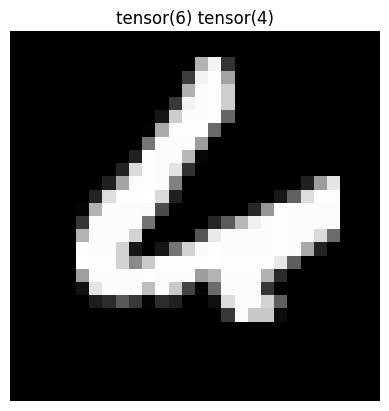

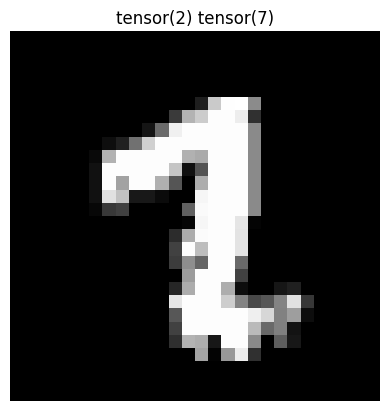

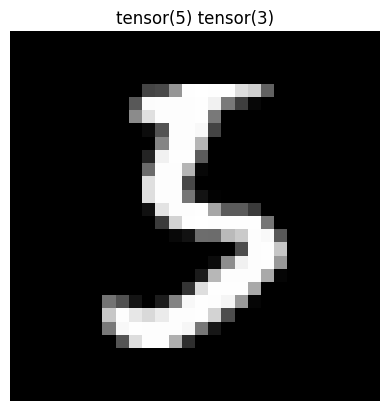

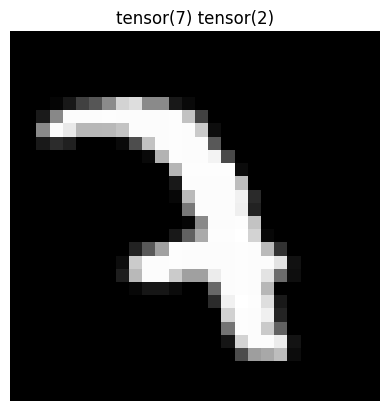

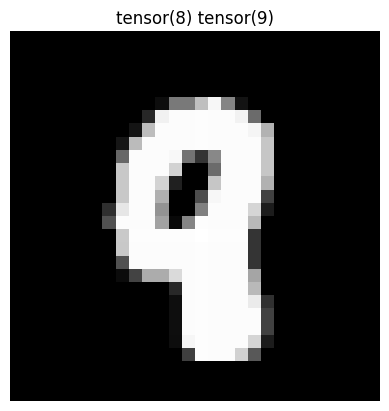

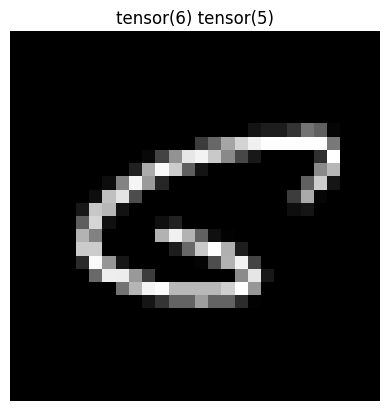

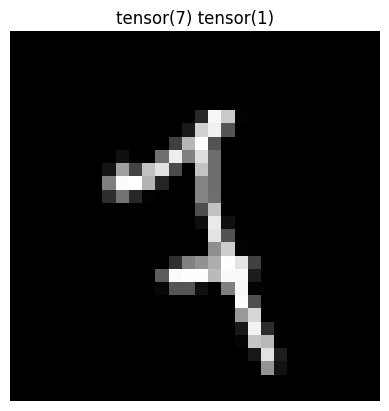

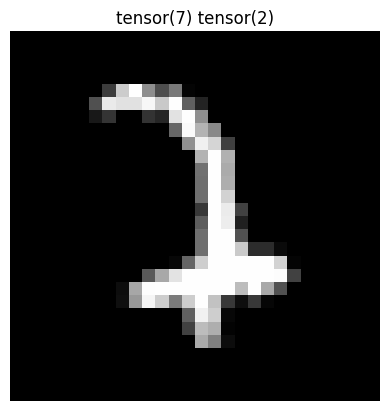

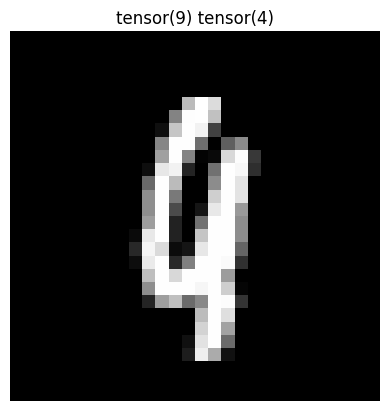

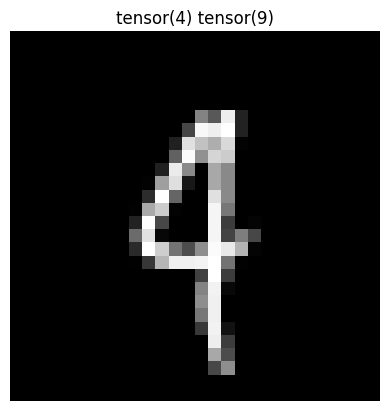

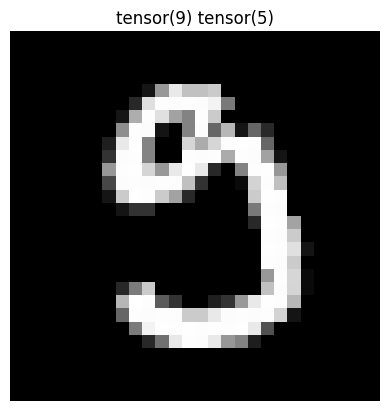

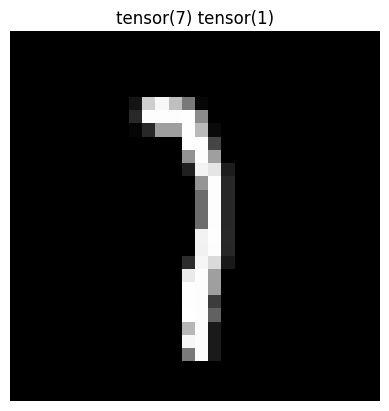

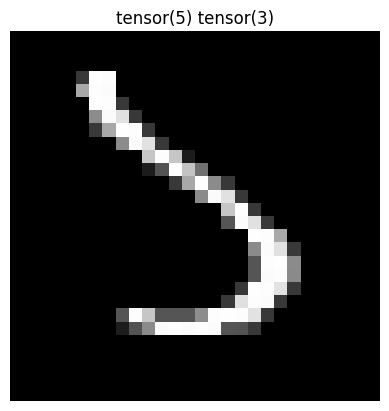

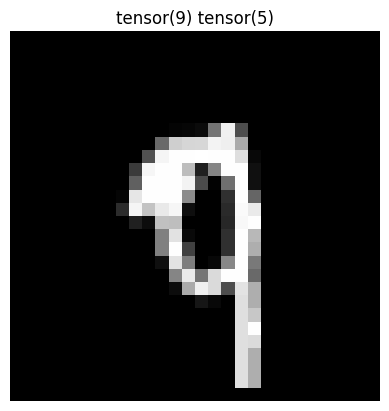

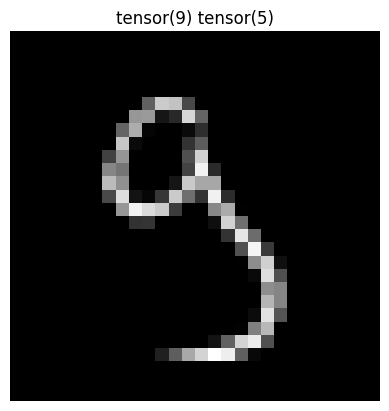

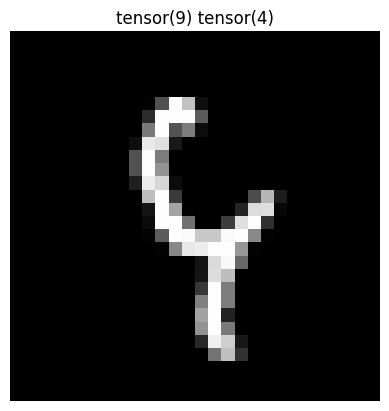

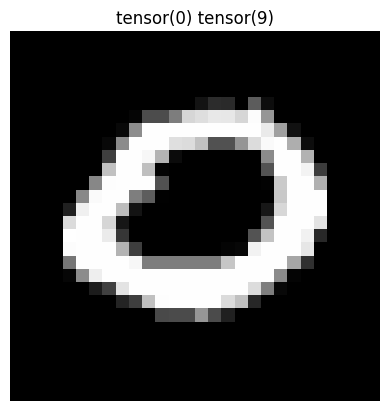

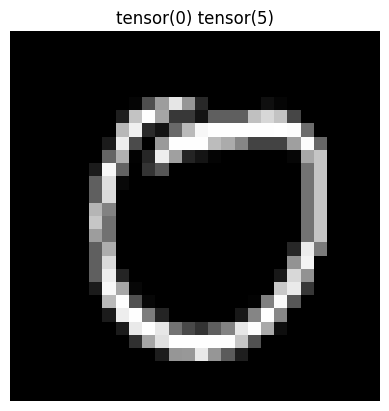

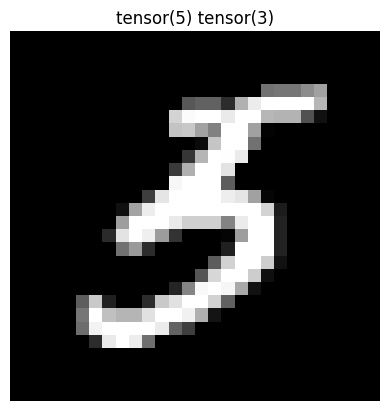

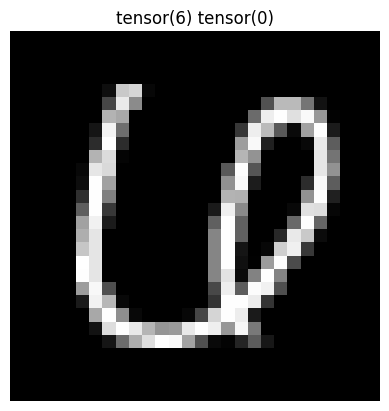

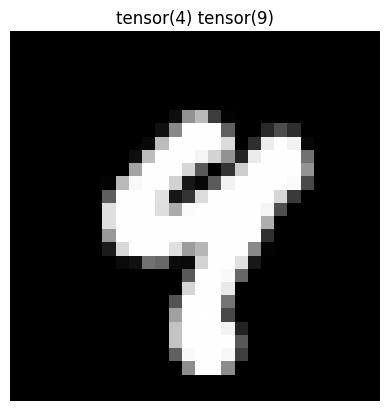

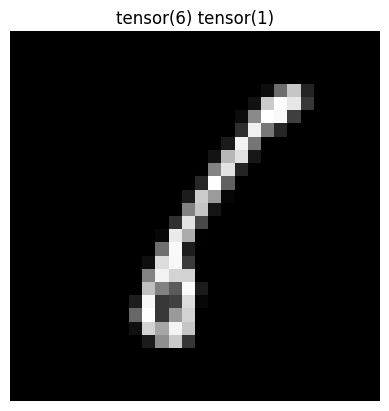

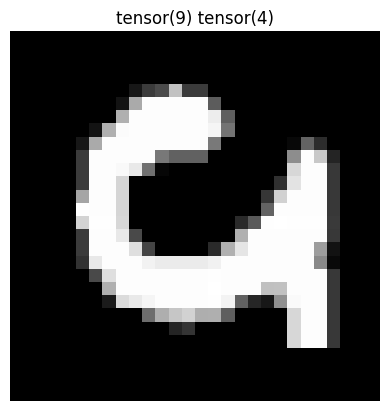

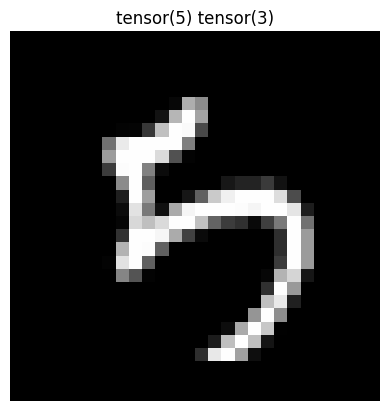

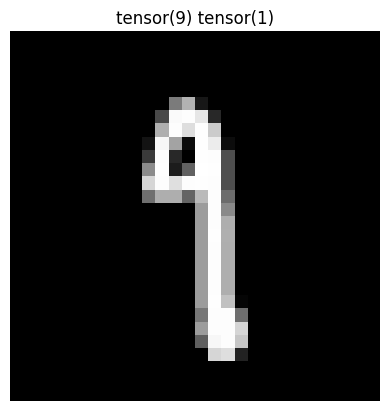

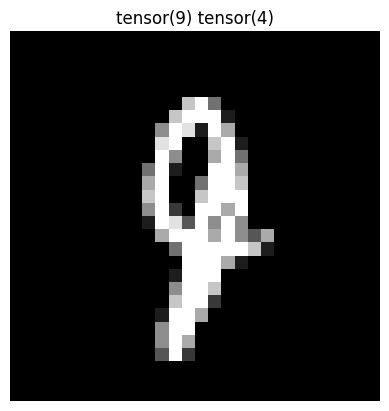

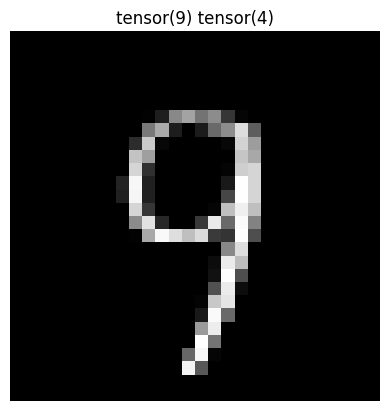

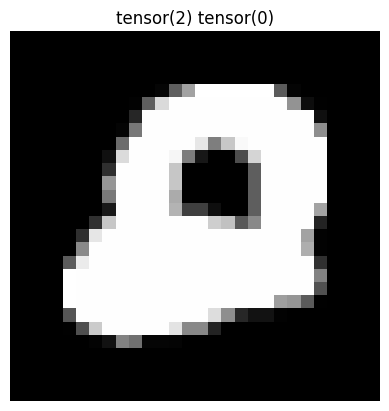

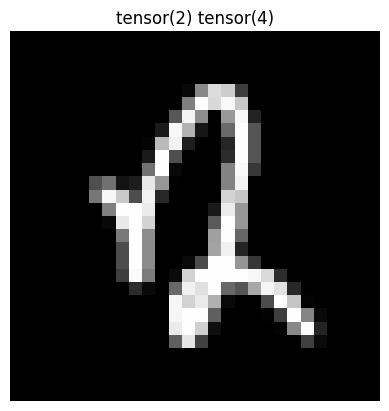

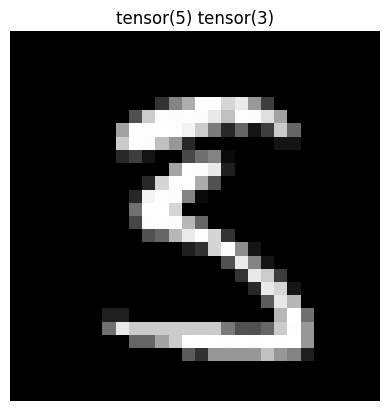

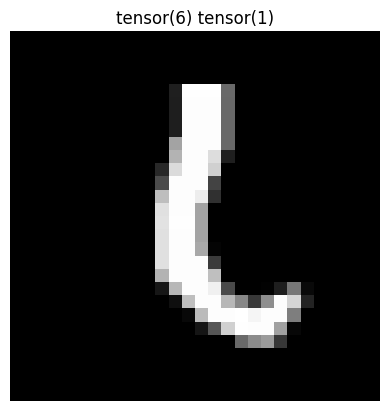

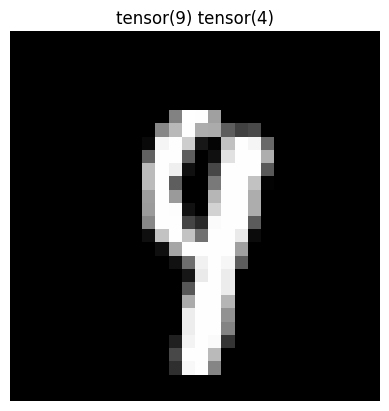

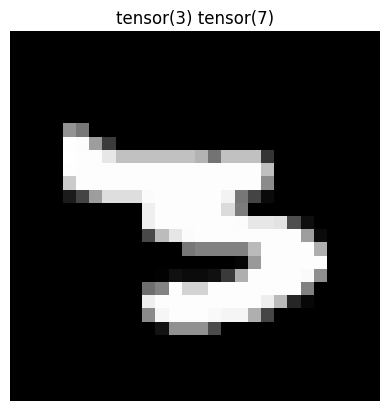

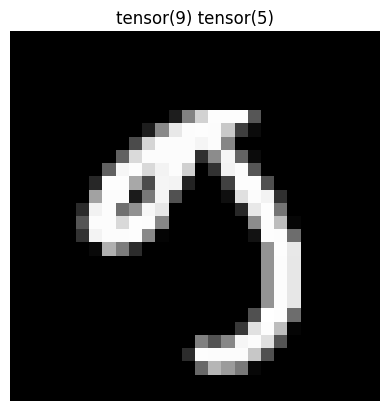

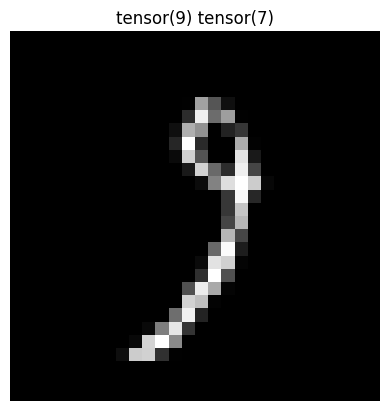

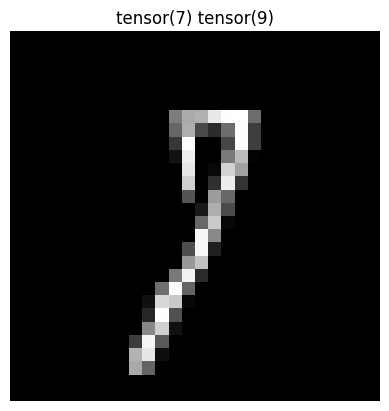

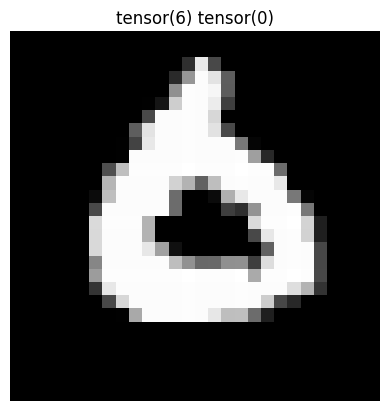

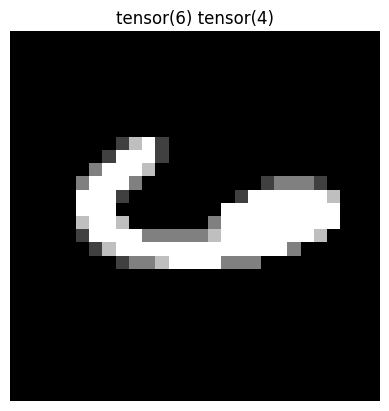

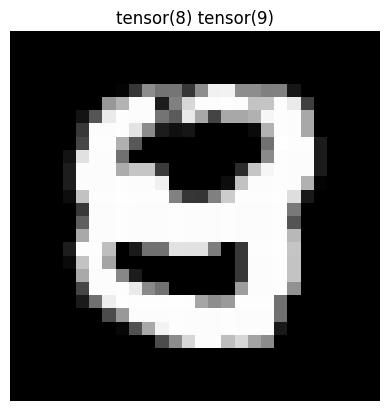

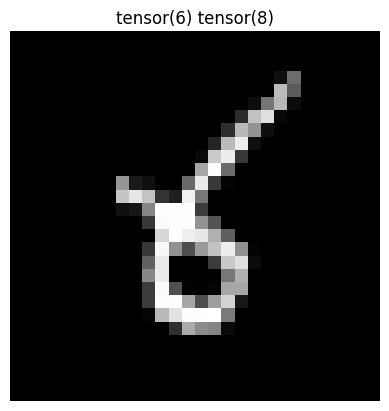

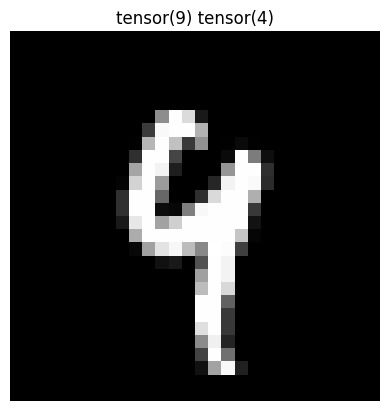

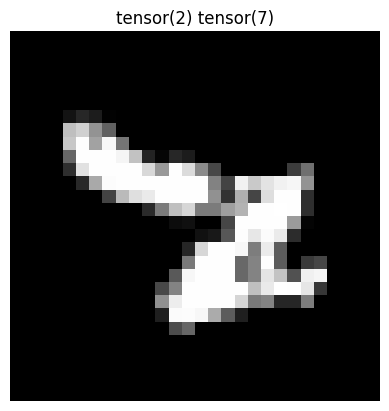

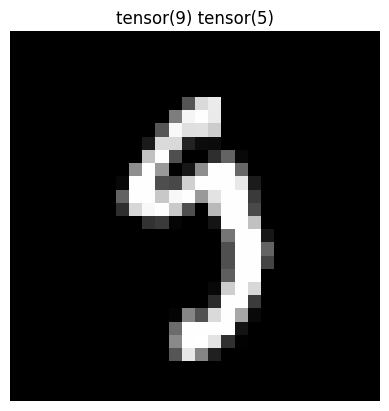

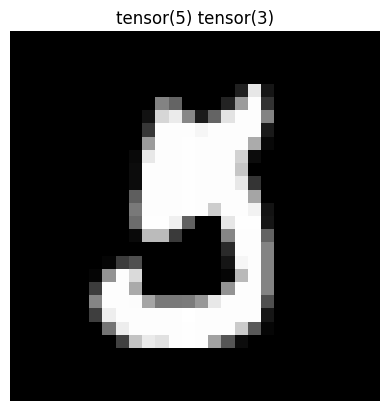

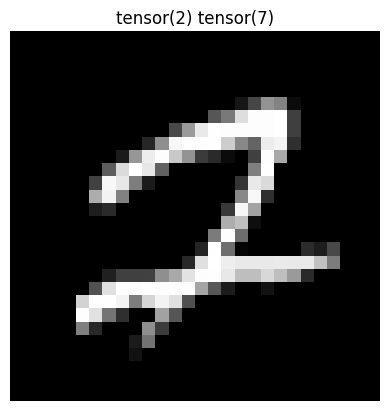

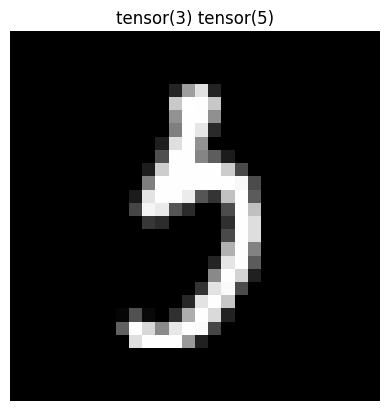

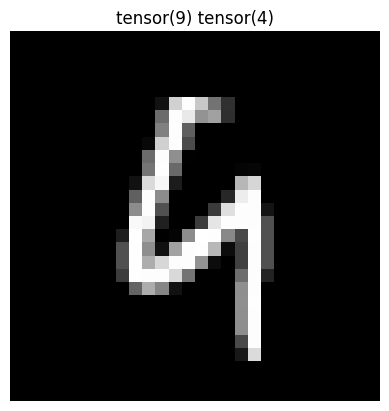

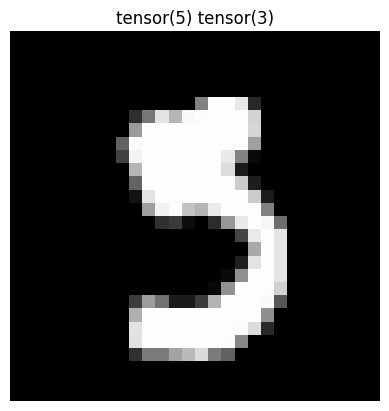

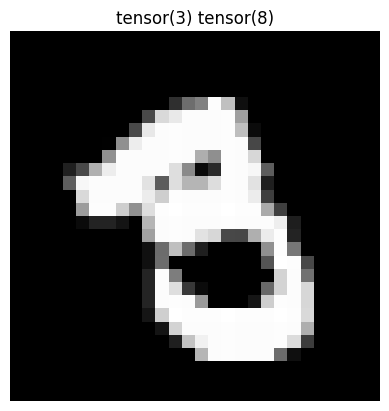

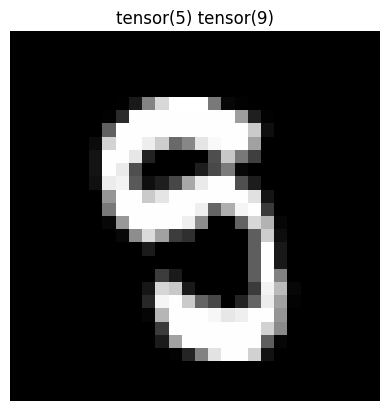

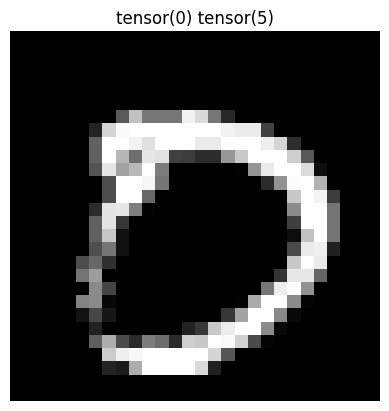

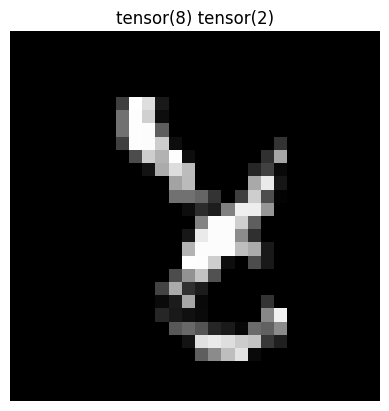

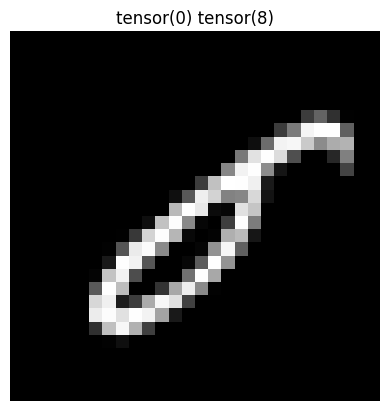

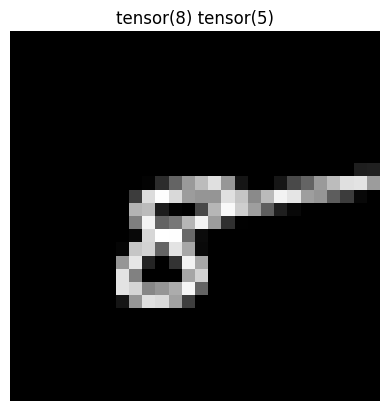

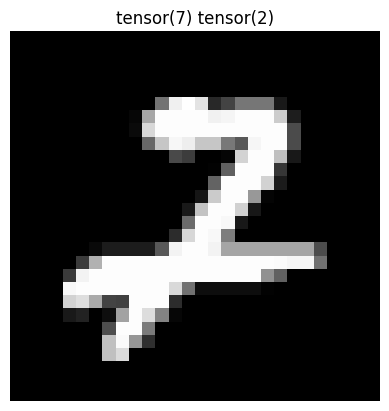

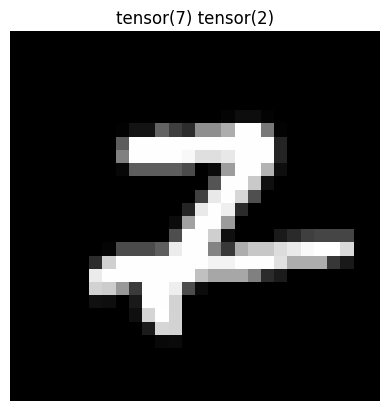

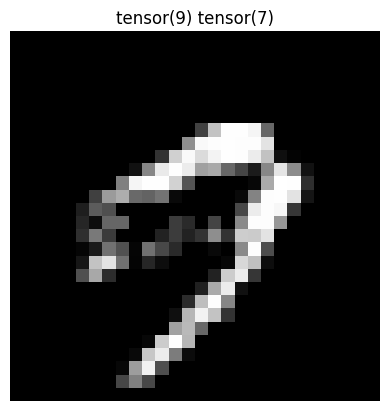

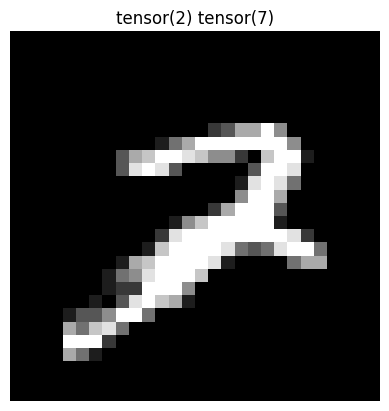

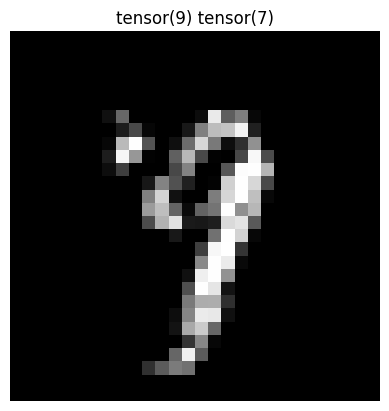

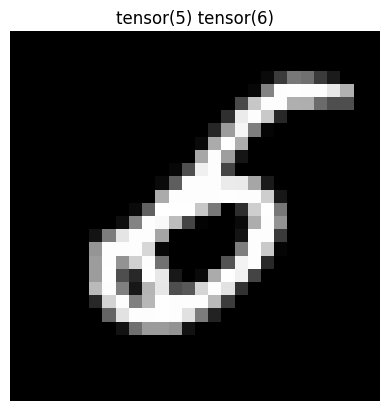

63


In [7]:
with torch.no_grad():
    model.eval()
    
    outputs_test = model(all_test_inputs)

count = 0

for k in range(outputs_test.size()[0]):
    if outputs_test[k].argmax().item() != all_test_labels[k].item():
        count += 1
        plot(all_test_inputs[k], all_test_labels[k], outputs_test[k].argmax())
    
print(count)